#

## 1) Setup

In [1]:
!pip install llama-index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.2/180.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing inst

In [2]:
!pip install llama-index-readers-file
!pip install llama-index-llms-openai
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 0s (1,565 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [5]:
from pathlib import Path
import re,os
import csv
from bs4 import BeautifulSoup
import pandas as pd
import subprocess
from pathlib import Path
from llama_index.core.node_parser import HTMLNodeParser, SentenceSplitter, SimpleFileNodeParser
from llama_index.readers.file import FlatReader

## 2) Download the data files

In [166]:
!mkdir -p 'data/'
!wget 'https://arxiv.org/pdf/2403.16971' -O 'data/AIOS.pdf'
!wget 'https://arxiv.org/pdf/2406.04692' -O 'data/Mixture_of_Agents.pdf'

--2024-08-23 17:04:07--  https://arxiv.org/pdf/2403.16971
Resolving arxiv.org (arxiv.org)... 151.101.195.42, 151.101.3.42, 151.101.131.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.195.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569103 (556K) [application/pdf]
Saving to: ‘data/AIOS.pdf’

data/AIOS.pdf       100%[===================>] 555.76K  --.-KB/s    in 0.01s   

2024-08-23 17:04:07 (51.0 MB/s) - ‘data/AIOS.pdf’ saved [569103/569103]

--2024-08-23 17:04:08--  https://arxiv.org/pdf/2406.04692
Resolving arxiv.org (arxiv.org)... 151.101.195.42, 151.101.3.42, 151.101.131.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.195.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1157463 (1.1M) [application/pdf]
Saving to: ‘data/Mixture_of_Agents.pdf’

data/Mixture_of_Age 100%[===================>]   1.10M  --.-KB/s    in 0.008s  

2024-08-23 17:04:08 (134 MB/s) - ‘data/Mixture_of_Agents.pdf’ saved [1157463/1157463]



## 3) Define the PDF processor to extract the Table of content automatically

In [111]:
class PDFContentProcessor:
    def __init__(self, source_pdf):
        self.source_pdf = source_pdf
        self.base_name = source_pdf.rstrip('.pdf')
        self.file_name = Path(source_pdf).name

    def transform_pdf_to_html(self):
        # Command to convert PDF to HTML using pdftohtml tool
      # First command to generate the main HTML file
        command = f"pdftohtml -s -i -enc UTF-8 '{self.source_pdf}' '{self.base_name}.html'"
       # Second command to generate the HTML file with the table of contents (ToC)
        command1 = f"pdftohtml -s -i -c -hidden -noframes -zoom 1.5 '{self.source_pdf}' '{self.base_name}.html'"


        try:
            subprocess.run(command, check=True, shell=True)
            subprocess.run(command1, check=True, shell=True)
        except subprocess.CalledProcessError as e:
            print(f"Error executing command: {e}")
        except Exception as e:
            print(f"An error occurred: {e}")

    def load_and_process_html(self):
        html_path = Path(f"./{self.base_name}.html")
        html_docs = FlatReader().load_data(html_path)
        parser = HTMLNodeParser(tags=["p"])
        nodes = parser.get_nodes_from_documents(html_docs)
        return self.improve_format(nodes[0].text)

    def improve_format(self, texto):
        texto = texto.replace('\xa0', ' ')
        texto = texto.replace('&#160;', ' ')
        texto = texto.replace('\n\n', '\n')
        texto = re.sub(r'(\.\n)', '.\n\n', texto)
        return texto

    def write_in_file(self, contenido):
        with open(f"{self.base_name}.txt", 'w', encoding='utf-8') as fichero:
            fichero.write(contenido)

    def split_text(self):
        txt_path = Path(f"{self.base_name}.txt")
        txt_docs = FlatReader().load_data(txt_path)
        splitter = SentenceSplitter(chunk_size=512, chunk_overlap=20)
        return splitter.get_nodes_from_documents(txt_docs)

    def process_html_toc(self):
          with open(f"{self.base_name}s.html", 'r', encoding='utf-8') as file:
              soup = BeautifulSoup(file, 'html.parser')

          main_ul = soup.find('ul')
          if not main_ul:
              return []

          list_lenght = len(main_ul.find_all('li', recursive=False))

          # Setting to handle HTML structure correctly
          if list_lenght == 1:
              main_ul = main_ul.find('ul')
          else:
              if main_ul and main_ul.li:
                  # Additional check to prevent deletion of a valid item
                  if not main_ul.li.a or main_ul.li.a.text.strip().lower() != 'introduction':
                      main_ul.li.decompose()

          if not main_ul:
              return []

          entries = []
          self.parse_list_items(main_ul, entries)
          return entries

    def parse_list_items(self, ul, entries, level=1):
        items = ul.find_all('li', recursive=False)
        for item in items:
            a_tag = item.find('a')
            if a_tag and 'href' in a_tag.attrs:
                page = a_tag['href'].split('#')[1]
                title = a_tag.text.strip()
                levels = [False] * 3
                if level <= 3:
                    levels[level - 1] = True
                entries.append([int(page), title] + levels)

            nested_ul = item.find('ul')
            if nested_ul:
                self.parse_list_items(nested_ul, entries, level + 1)

    def write_toc_to_csv(self, toc_entries):
        with open(f"{self.base_name}_output.csv", 'w', newline='', encoding='utf-8') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(['page', 'title', 'first_level', 'second_level', 'third_level'])
            csvwriter.writerows(toc_entries)

    def read_and_prepare_sections(self):
        df = pd.read_csv(f"{self.base_name}_output.csv")
        sections_info = [{
            'title': row['title'],
            'page': row['page'],
            'level': 1 if row['first_level'] else 2 if row['second_level'] else 3 if row['third_level'] else None
        } for index, row in df.iterrows()]
        return sections_info

    def add_metadata_to_nodes(self, nodes, sections_info):
        last_index_found_global = 0
        for node_index, node in enumerate(nodes):
            text_content = node.text
            node.metadata = {"page": [], "section": [], "file_name": self.file_name}

            found = False
            last_index_found = last_index_found_global

            for info in sections_info[last_index_found:]:
                pattern = re.escape(info['title']) + r'\n'
                match = re.search(pattern, text_content)
                if match:
                    last_index_found_global += 1
                    node.metadata['section'].append(info['title'])
                    node.metadata['page'].append(info['page'])
                    superiors = self.get_superior_sections(info['title'], sections_info)
                    for sup_title, sup_page in superiors:
                        if sup_title not in node.metadata['section']:
                            node.metadata['section'].insert(0, sup_title)
                            node.metadata['page'].insert(0, sup_page)
                    found = True
                    break

            if not found and node_index > 0:
                node.metadata = nodes[node_index - 1].metadata.copy()

    def get_superior_sections(self, section_title, sections_info):
        results = []
        current_entry = next((entry for entry in sections_info if entry['title'] == section_title), None)

        if not current_entry:
            return results

        current_level = current_entry['level']
        if current_level > 1:
            index_of_current = sections_info.index(current_entry)
            for entry in reversed(sections_info[:index_of_current]):
                if entry['level'] == current_level - 1:
                    results.insert(0, (entry['title'], entry['page']))
                    current_level -= 1
                    if current_level == 1:
                        break

        return results


    def cleanup(self):
            # Get the directory where the PDF file is located
            directory = Path(self.source_pdf).parent
            base_name = Path(self.base_name).name


            for file in directory.iterdir():
                #  Check if the file starts with the base name and it is not a PDF file
                if file.is_file():
                    if file.stem.startswith(base_name) and file.suffix != '.pdf':
                        try:
                            os.remove(file)
                            print(f"Deleted: {file}")
                        except Exception as e:
                            print(f"Error deleting {file}: {e}")
                    else:
                        print(f"Skipped (not matching criteria): {file}")
                else:
                    print(f"Skipped (not a file): {file}")

    @classmethod
    def process_multiple_pdfs(cls, pdf_directory):
        all_nodes = []
        for pdf_file in Path(pdf_directory).glob("*.pdf"):
            processor = cls(str(pdf_file))
            processor.transform_pdf_to_html()
            clean_text = processor.load_and_process_html()
            processor.write_in_file(clean_text)
            nodes = processor.split_text()
            toc_entries = processor.process_html_toc()
            processor.write_toc_to_csv(toc_entries)
            sections_info = processor.read_and_prepare_sections()
            processor.add_metadata_to_nodes(nodes, sections_info)
            all_nodes.extend(nodes)
            processor.cleanup()  # Clean additional files

        all_nodes_dict = {n.node_id: n for n in all_nodes}
        return all_nodes_dict, all_nodes


Process one file

In [112]:

pdf_directory_or_file = "./data/Mixture_of_Agents.pdf"

if os.path.isfile(pdf_directory_or_file):
    processor = PDFContentProcessor(pdf_directory_or_file)
    processor.transform_pdf_to_html()
    clean_text = processor.load_and_process_html()
    processor.write_in_file(clean_text)
    nodes = processor.split_text()
    toc_entries = processor.process_html_toc()
    processor.write_toc_to_csv(toc_entries)
    sections_info = processor.read_and_prepare_sections()
    processor.add_metadata_to_nodes(nodes, sections_info)
    all_nodes_dict = {n.node_id: n for n in nodes}
    processor.cleanup()  # Limpiar archivos adicionales
else:
    all_nodes_dict,nodes  = PDFContentProcessor.process_multiple_pdfs(pdf_directory_or_file)

for node_id, node in all_nodes_dict.items():
    print(node_id, node.metadata)

Deleted: data/Mixture_of_Agents.html
Skipped (not matching criteria): data/Mixture_of_Agents.pdf
Skipped (not a file): data/.ipynb_checkpoints
Deleted: data/Mixture_of_Agents_output.csv
Deleted: data/Mixture_of_Agents.txt
Deleted: data/Mixture_of_Agents-html.html
Skipped (not matching criteria): data/AIOS.pdf
Deleted: data/Mixture_of_Agentss.html
27d3f48d-3ff2-4451-bb74-c1dc8db5b9b0 {'page': [1], 'section': ['Introduction'], 'file_name': 'Mixture_of_Agents.pdf'}
effa3e5c-be5e-4298-abab-6487daca706b {'page': [1], 'section': ['Introduction'], 'file_name': 'Mixture_of_Agents.pdf'}
7a1dc31f-f75a-452b-b336-8a1e6e2e5ce1 {'page': [1], 'section': ['Introduction'], 'file_name': 'Mixture_of_Agents.pdf'}
07cfffd6-7c11-4432-99f8-67f915c88172 {'page': [3], 'section': ['Mixture-of-Agents Methodology'], 'file_name': 'Mixture_of_Agents.pdf'}
56348caa-7ef4-4fc9-885c-635caacc206a {'page': [3, 3], 'section': ['Mixture-of-Agents Methodology', 'Mixture-of-Agents'], 'file_name': 'Mixture_of_Agents.pdf'}
dbc

Process multiple files

In [113]:
pdf_directory_or_file = "./data/"

if os.path.isfile(pdf_directory_or_file):
    processor = PDFContentProcessor(pdf_directory_or_file)
    processor.transform_pdf_to_html()
    clean_text = processor.load_and_process_html()
    processor.write_in_file(clean_text)
    nodes = processor.split_text()
    toc_entries = processor.process_html_toc()
    processor.write_toc_to_csv(toc_entries)
    sections_info = processor.read_and_prepare_sections()
    processor.add_metadata_to_nodes(nodes, sections_info)
    all_nodes_dict = {n.node_id: n for n in nodes}
    processor.cleanup()  # Limpiar archivos adicionales
else:
    all_nodes_dict,nodes  = PDFContentProcessor.process_multiple_pdfs(pdf_directory_or_file)

for node_id, node in all_nodes_dict.items():
    print(node_id, node.metadata)

Deleted: data/Mixture_of_Agents.html
Skipped (not matching criteria): data/Mixture_of_Agents.pdf
Skipped (not a file): data/.ipynb_checkpoints
Deleted: data/Mixture_of_Agents_output.csv
Deleted: data/Mixture_of_Agents.txt
Deleted: data/Mixture_of_Agents-html.html
Skipped (not matching criteria): data/AIOS.pdf
Deleted: data/Mixture_of_Agentss.html
Skipped (not matching criteria): data/Mixture_of_Agents.pdf
Skipped (not a file): data/.ipynb_checkpoints
Deleted: data/AIOSs.html
Deleted: data/AIOS_output.csv
Skipped (not matching criteria): data/AIOS.pdf
Deleted: data/AIOS.txt
Deleted: data/AIOS-html.html
Deleted: data/AIOS.html
68742f8d-8572-4dde-9f89-614f64b30ab6 {'page': [1], 'section': ['Introduction'], 'file_name': 'Mixture_of_Agents.pdf'}
294b0f49-7d4e-48a2-b6ca-b550d1bc5dbf {'page': [1], 'section': ['Introduction'], 'file_name': 'Mixture_of_Agents.pdf'}
9c1dea86-a69b-40fd-a42c-202b7e9628ad {'page': [1], 'section': ['Introduction'], 'file_name': 'Mixture_of_Agents.pdf'}
f65bf8c5-304b

In [114]:
len(nodes)

60

## 4) Create a Vector Store Index

Set up the OpenAI API for the LLM and the embedding model.

In [55]:
os.environ["OPENAI_API_KEY"] = 'YOUR_API_KEY'

In [56]:
import logging
import sys
from llama_index.core.callbacks import CallbackManager, LlamaDebugHandler
from llama_index.core import Settings

logging.basicConfig(filename='app.log',
                    level=logging.DEBUG,
                    force=True, # Resets any previous configuration
                    )

# Using the LlamaDebugHandler to print the trace
llama_debug = LlamaDebugHandler(print_trace_on_end=True)
callback_manager = CallbackManager([llama_debug])

Settings.callback_manager = callback_manager

In [115]:
from llama_index.llms.openai import OpenAI
from llama_index.core.settings import Settings

from llama_index.core.callbacks import CallbackManager, LlamaDebugHandler

llm_gpt35t = OpenAI(temperature=0.0, model="gpt-3.5-turbo", callback_manager=callback_manager)

In [116]:
from llama_index.core import VectorStoreIndex
index_chunk = VectorStoreIndex(nodes, callback_manager=callback_manager)

**********
Trace: index_construction
    |_embedding -> 0.735582 seconds
**********


In [162]:
retriever = index_chunk.as_retriever(similarity_top_k=5)

In [163]:
from llama_index.core.query_engine import RetrieverQueryEngine
query_engine_base = RetrieverQueryEngine.from_args(retriever, llm=llm_gpt35t)

### 4.1) Test with no metafilters

In [164]:
response = query_engine_base.query(
   "Who are the authors of the papers?"
)
print(response)

**********
Trace: query
    |_query -> 9.186156 seconds
      |_retrieve -> 0.168859 seconds
        |_embedding -> 0.161118 seconds
      |_synthesize -> 9.016586 seconds
        |_templating -> 2.3e-05 seconds
        |_llm -> 8.999911 seconds
**********
Hendrycks, D., Burns, C., Kadavath, S., Arora, A., Basart, S., Tang, E., Song, D., Steinhardt, J., Jiang, A. Q., Sablayrolles, A., Roux, A., Mensch, A., Savary, B., Bamford, C., Chaplot, D. S., de Las Casas, D., Hanna, E. B., Bressand, F., Lengyel, G., Bour, G., Lample, G., Lavaud, L. R., Saulnier, L., Lachaux, M., Stock, P., Subramanian, S., Yang, S., Antoniak, S., Scao, T. L., Gervet, T., Lavril, T., Wang, T., Lacroix, T., Sayed, W. E., Jiang, D., Ren, X., Lin, B. Y., Touvron, H., Martin, L., Stone, K., Albert, P., Almahairi, A., Babaei, Y., Bashlykov, N., Batra, S., Bhargava, P., Bhosale, S., Wang, H., Polo, F. M., Sun, Y., Kundu, S., Xing, E., Yurochkin, M., Wang, L., Xu, W., Lan, Y., Hu, Z., Lee, R. K.-W., Lim, E.-P., Wang, Q., 

As we can see, the answer is not correct

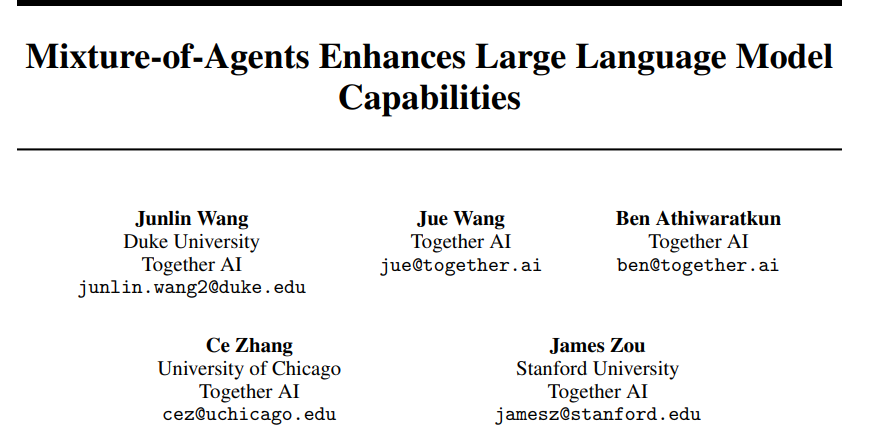

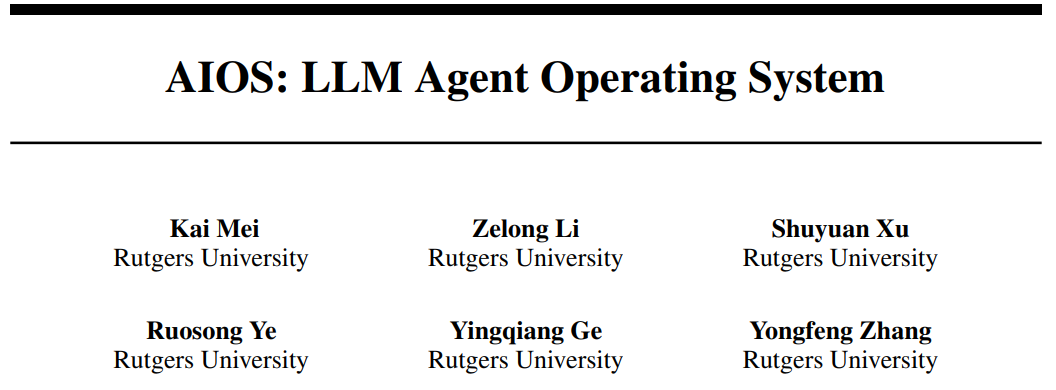

In [161]:
from llama_index.core.response.notebook_utils import display_source_node

Showing the retriever nodes. This retrieves information from the references section of research papers. One of the challenges RAG (Retrieval-Augmented Generation) faces is akin to finding a needle in a haystack. When there's too much context, the LLM (Large Language Model) can get confused and perform poorly.

In [165]:
retrieval=query_engine_base.retrieve('Who are the authors of the papers?')
for n in retrieval:
  display_source_node(n, source_length=10050)

**********
Trace: query
    |_retrieve -> 0.193744 seconds
      |_embedding -> 0.186615 seconds
**********


**Node ID:** 0e1682b0-ab1f-4d5a-aeda-805fd9fa17f5<br>**Similarity:** 0.7726008048281279<br>**Text:** arXiv preprint arXiv:2401.14196
, 2024.

Hendrycks, D., Burns, C., Kadavath, S., Arora, A., Basart, S., Tang, E., Song, D., and Steinhardt, J.

Measuring mathematical problem solving with the math dataset.

arXiv preprint arXiv:2103.03874
,
2021.

Huang, Y., Feng, X., Li, B., Xiang, Y., Wang, H., Qin, B., and Liu, T. Enabling ensemble learn-
ing for heterogeneous large language models with deep parallel collaboration.

arXiv preprint
arXiv:2404.12715
, 2024.

Jiang, A. Q., Sablayrolles, A., Roux, A., Mensch, A., Savary, B., Bamford, C., Chaplot, D. S.,
de Las Casas, D., Hanna, E. B., Bressand, F., Lengyel, G., Bour, G., Lample, G., Lavaud, L. R.,
Saulnier, L., Lachaux, M., Stock, P., Subramanian, S., Yang, S., Antoniak, S., Scao, T. L., Gervet, T.,
Lavril, T., Wang, T., Lacroix, T., and Sayed, W. E. Mixtral of experts.

CoRR
, abs/2401.04088, 2024.

doi: 10.48550/ARXIV.2401.04088. URL
https://doi.org/10.48550/arXiv.2401.04088
.

Jiang, D., Ren, X., and Lin, B. Y. LLM-blender: Ensembling large language models with pairwise
ranking and generative fusion. In Rogers, A., Boyd-Graber, J., and Okazaki, N. (eds.),
Proceedings
of the 61st Annual Meeting of the Association for Computational Linguistics (Volume 1: Long
Papers)
, pp. 14165–14178, Toronto, Canada, July 2023. Association for Computational Linguistics.<br>

**Node ID:** 2ecbec1f-656e-42c7-b82a-a35ec1653041<br>**Similarity:** 0.7650769559477965<br>**Text:** Llama: Open and efficient foundation language models.

arXiv
preprint arXiv:2302.13971
, 2023a.

Touvron, H., Martin, L., Stone, K., Albert, P., Almahairi, A., Babaei, Y., Bashlykov, N., Batra, S.,
Bhargava, P., Bhosale, S., et al. Llama 2: Open foundation and fine-tuned chat models.

arXiv
preprint arXiv:2307.09288
, 2023b.

Wang, H., Polo, F. M., Sun, Y., Kundu, S., Xing, E., and Yurochkin, M. Fusing models with
complementary expertise. In
The Twelfth International Conference on Learning Representations
,
2024a. URL
https://openreview.net/forum?id=PhMrGCMIRL
.

Wang, L., Xu, W., Lan, Y., Hu, Z., Lan, Y., Lee, R. K.-W., and Lim, E.-P. Plan-and-solve prompt-
ing: Improving zero-shot chain-of-thought reasoning by large language models.

arXiv preprint
arXiv:2305.04091
, 2023.

Wang, Q., Wang, Z., Su, Y., Tong, H., and Song, Y. Rethinking the bounds of llm reasoning: Are
multi-agent discussions the key?
arXiv preprint arXiv:2402.18272
, 2024b.

Wang, X., Wei, J., Schuurmans, D., Le, Q., Chi, E., Narang, S., Chowdhery, A., and Zhou,
D. Self-consistency improves chain of thought reasoning in language models.

arXiv preprint
arXiv:2203.11171
, 2022.

Wei, J., Wang, X., Schuurmans, D., Bosma, M., Xia, F., Chi, E., Le, Q. V., Zhou, D., et al. Chain-of-
thought prompting elicits reasoning in large language models.

Advances in Neural Information
Processing Systems
, 35:24824–24837, 2022.<br>

**Node ID:** 7f0f306f-88c2-4f5c-b40d-7e5688304507<br>**Similarity:** 0.761624717129846<br>**Text:** **Cul-
tivate a Love for Writing and Reading**:... 4. **Choose Your
Niche**:... 5. **Finish Your Work**:... 10. **Self-Publishing**:...

11. **Marketing and Promotion**:... 12. **Continuous Learning
and Writing**:...

Table 8: Results on the MATH task. We evaluate different aggregators, with all six models serving as
proposers in each MoA layer.

Aggregator
Layer 1
Layer 2
Layer 3
Qwen1.5-72B-Chat
0.428
0.526
0.552
Qwen1.5-110B-Chat
0.500
0.570
0.576
Wizard 8x22b
0.544
0.574
0.580
Mixtral-8x22B-Instruct-v0.1
0.282
0.534
0.556
Llama-3-70B-Instruct
0.456
0.584
0.578
dbrx-instruct
0.314
0.456
0.522
15<br>

**Node ID:** b37f2cb6-050d-4599-8cc5-7c6e9b164763<br>**Similarity:** 0.7615838119334416<br>**Text:** In
The Twelfth International Conference on Learning
Representations
, 2023.

[49] Chen Qian, Xin Cong, Cheng Yang, Weize Chen, Yusheng Su, Juyuan Xu, Zhiyuan Liu,
and Maosong Sun.

Communicative agents for software development.

arXiv preprint
arXiv:2307.07924
, 2023.

[50] Qingyun Wu, Gagan Bansal, Jieyu Zhang, Yiran Wu, Shaokun Zhang, Erkang Zhu, Beibin Li,
Li Jiang, Xiaoyun Zhang, and Chi Wang. Autogen: Enabling next-gen llm applications via
multi-agent conversation framework.

arXiv preprint arXiv:2308.08155
, 2023.

[51] Martin Josifoski, Lars Klein, Maxime Peyrard, Yifei Li, Saibo Geng, Julian Paul Schnitzler,
Yuxing Yao, Jiheng Wei, Debjit Paul, and Robert West. Flows: Building blocks of reasoning
and collaborating ai.

arXiv preprint arXiv:2308.01285
, 2023.

[52] Yao Fu, Hao Peng, Tushar Khot, and Mirella Lapata. Improving language model negotiation
with self-play and in-context learning from ai feedback.

arXiv preprint arXiv:2305.10142
, 2023.

[53] Yilun Du, Shuang Li, Antonio Torralba, Joshua B Tenenbaum, and Igor Mordatch. Improv-
ing factuality and reasoning in language models through multiagent debate.

arXiv preprint
arXiv:2305.14325
, 2023.

[54] Chi-Min Chan, Weize Chen, Yusheng Su, Jianxuan Yu, Wei Xue, Shanghang Zhang, Jie Fu,
and Zhiyuan Liu. Chateval: Towards better llm-based evaluators through multi-agent debate. In
The Twelfth International Conference on Learning Representations
, 2023.<br>

**Node ID:** 05a5c3ca-2316-4792-bc2d-8efd86d2dc9f<br>**Similarity:** 0.7599722794822272<br>**Text:** Association for Computational Linguistics.

doi: 10.18653/v1/2023.acl-long.792. URL
https://aclanthology.org/2023.acl-long.

792
.

Kojima, T., Gu, S. S., Reid, M., Matsuo, Y., and Iwasawa, Y. Large language models are zero-shot
reasoners.

Advances in neural information processing systems
, 35:22199–22213, 2022.

Liang, T., He, Z., Jiao, W., Wang, X., Wang, Y., Wang, R., Yang, Y., Tu, Z., and Shi, S. Encour-
aging divergent thinking in large language models through multi-agent debate.

arXiv preprint
arXiv:2305.19118
, 2023.

10
Ling, Z., Fang, Y., Li, X., Huang, Z., Lee, M., Memisevic, R., and Su, H. Deductive verification of
chain-of-thought reasoning.

arXiv preprint arXiv:2306.03872
, 2023.

Lu, K., Yuan, H., Lin, R., Lin, J., Yuan, Z., Zhou, C., and Zhou, J. Routing to the expert: Efficient
reward-guided ensemble of large language models, 2023.

OpenAI. Gpt-4 technical report, 2023.

Ouyang, L., Wu, J., Jiang, X., Almeida, D., Wainwright, C., Mishkin, P., Zhang, C., Agarwal, S.,
Slama, K., Ray, A., et al. Training language models to follow instructions with human feedback.

Advances in neural information processing systems
, 35:27730–27744, 2022.

Papineni, K., Roukos, S., Ward, T., and Zhu, W. Bleu: a method for automatic evaluation of machine
translation. In
Proceedings of the 40th Annual Meeting of the Association for Computational
Linguistics, July 6-12, 2002, Philadelphia, PA, USA
, pp. 311–318. ACL, 2002. doi: 10.3115/
1073083.1073135.<br>

Let's try asking separately for each of the papers.

In [120]:
response = query_engine_base.query(
    'Who are the authors of the paper "Mixture-of-Agents Enhances Large Language Model Capabilities"?'
)
print(response)

**********
Trace: query
    |_query -> 0.976588 seconds
      |_retrieve -> 0.181821 seconds
        |_embedding -> 0.174943 seconds
      |_synthesize -> 0.794099 seconds
        |_templating -> 2.3e-05 seconds
        |_llm -> 0.783508 seconds
**********
Junlin Wang, Jue Wang, Ben Athiwaratkun, Ce Zhang, and James Zou


In [121]:
response = query_engine_base.query(
    'Who are the authors of the paper "AIOS: LLM Agent Operating System"?'
)
print(response)


**********
Trace: query
    |_query -> 1.137017 seconds
      |_retrieve -> 0.122258 seconds
        |_embedding -> 0.115581 seconds
      |_synthesize -> 1.01413 seconds
        |_templating -> 2.2e-05 seconds
        |_llm -> 1.002909 seconds
**********
Kai Mei, Zelong Li, Shuyuan Xu, Ruosong Ye, Yingqiang Ge, and Yongfeng Zhang are the authors of the paper "AIOS: LLM Agent Operating System."


By separating the question by paper, the model has answered correctly.

## 5) Metafilters

In [62]:
nodes[0].text

'Mixture-of-Agents Enhances Large Language Model\nCapabilities\nJunlin Wang\nDuke University\nTogether AI\njunlin.wang2@duke.edu\nJue Wang\nTogether AI\njue@together.ai\nBen Athiwaratkun\nTogether AI\nben@together.ai\nCe Zhang\nUniversity of Chicago\nTogether AI\ncez@uchicago.edu\nJames Zou\nStanford University\nTogether AI\njamesz@stanford.edu\nAbstract\nRecent advances in large language models (LLMs) demonstrate substantial capa-\nbilities in natural language understanding and generation tasks. With the growing\nnumber of LLMs, how to harness the collective expertise of multiple LLMs is an\nexciting open direction. Toward this goal, we propose a new approach that lever-\nages the collective strengths of multiple LLMs through a Mixture-of-Agents (MoA)\nmethodology. In our approach, we construct a layered MoA architecture wherein\neach layer comprises multiple LLM agents. Each agent takes all the outputs from\nagents in the previous layer as auxiliary information in generating its resp

In [65]:
nodes[0].metadata

{'page': [1],
 'section': ['Introduction'],
 'file_name': 'Mixture_of_Agents.pdf'}

In [122]:
nodes[30].text

'AIOS: LLM Agent Operating System\nKai Mei\nRutgers University\nZelong Li\nRutgers University\nShuyuan Xu\nRutgers University\nRuosong Ye\nRutgers University\nYingqiang Ge\nRutgers University\nYongfeng Zhang\nRutgers University\nAbstract\nThe integration and deployment of large language model (LLM)-based intelligent\nagents have been fraught with challenges that compromise their efficiency and\nefficacy. Among these issues are sub-optimal scheduling and resource allocation\nof agent requests over the LLM, the difficulties in maintaining context during\ninteractions between agent and LLM, and the complexities inherent in integrating\nheterogeneous agents with different capabilities and specializations. The rapid\nincrease of agent quantity and complexity further exacerbates these issues, often\nleading to bottlenecks and sub-optimal utilization of resources. Inspired by these\nchallenges, this paper presents AIOS, an LLM agent operating system, which\nembeds large language model into op

In [123]:
nodes[30].metadata

{'page': [1], 'section': ['Introduction'], 'file_name': 'AIOS.pdf'}

In [67]:
from llama_index.core.vector_stores import MetadataFilters,MetadataFilter


In [148]:
filters = MetadataFilters(
    filters=[
      MetadataFilter(key="file_name", value='AIOS.pdf'),
      MetadataFilter(key="section", value=['Introduction']),

]
    ,condition='and'

    )

retriever = index_chunk.as_retriever(filters=filters)

In [149]:
docs = retriever.retrieve("Who are the authors of the papers")  # for this post - the prompt I give here is not critical

# printing out the metadata
for i in range(len(docs)):
    print(docs[i].metadata['section'])

**********
Trace: query
    |_retrieve -> 0.125014 seconds
      |_embedding -> 0.122924 seconds
**********
['Introduction']
['Introduction']


In [150]:
query_engine=index_chunk.as_query_engine(similarity_top_k=5,filters = filters)

In [151]:
response = query_engine.query("Who are the authors of the paper?")
print(response)

**********
Trace: query
    |_query -> 1.089932 seconds
      |_retrieve -> 0.185501 seconds
        |_embedding -> 0.183662 seconds
      |_synthesize -> 0.903702 seconds
        |_templating -> 2.2e-05 seconds
        |_llm -> 0.895492 seconds
**********
Kai Mei, Zelong Li, Shuyuan Xu, Ruosong Ye, Yingqiang Ge, Yongfeng Zhang


By narrowing the context further, the model responds well.

In [157]:
filters = MetadataFilters(
    filters=[
     # MetadataFilter(key="file_name", value='AIOS.pdf'),
      MetadataFilter(key="section", value=['Introduction']),

]

    )

retriever = index_chunk.as_retriever(filters=filters)

In [158]:
query_engine=index_chunk.as_query_engine(similarity_top_k=5,filters = filters)

In [159]:
response = query_engine.query("Who are the authors of the papers?")
print(response)

**********
Trace: query
    |_query -> 1.400861 seconds
      |_retrieve -> 0.210936 seconds
        |_embedding -> 0.208705 seconds
      |_synthesize -> 1.189291 seconds
        |_templating -> 2.3e-05 seconds
        |_llm -> 1.178552 seconds
**********
Junlin Wang, Jue Wang, Ben Athiwaratkun, Ce Zhang, James Zou, Kai Mei, Zelong Li, Shuyuan Xu, Ruosong Ye, Yingqiang Ge, Yongfeng Zhang


Once again it has worked as expected.

Thank you for making it to the end of the tutorial! 🎉 I hope you found everything you needed. Happy coding! 🚀